In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline


In [2]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18);

In [3]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()



In [4]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [5]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

In [41]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))


In [42]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3999, 224, 224, 1)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model_1 = Sequential()
model_1.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_1.add(Dropout(0.5))  ##added
model_1.add(Dense(5, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,405 (2.57 MB)

 Trainable params: 674,405 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=80,
                        validation_data=(X_test, y_test))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.7136 - loss: 0.6036 - val_accuracy: 0.4320 - val_loss: 3.1111
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.7003 - loss: 0.6321 - val_accuracy: 0.4380 - val_loss: 3.0272
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.7117 - loss: 0.6006 - val_accuracy: 0.4350 - val_loss: 2.7744
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.6812 - loss: 0.6308 - val_accuracy: 0.4390 - val_loss: 2.6056
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.7120 - loss: 0.5968 - val_accuracy: 0.4430 - val_loss: 2.9682
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.6927 - loss: 0.6361 - val_accuracy: 0.4440 - val_loss: 2.7548
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.6923 - loss: 0.6356 - val_accuracy: 0.4520 - val_loss: 2.7321
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.7073 - loss: 0

In [47]:
# max validation score @ Epoch 115/150
max(history_1.history['val_accuracy'])

0.46700000762939453

In [48]:
model_1.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4508 - loss: 3.8774


[3.619974374771118, 0.4560000002384186]

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step
Normalized confusion matrix
[[0.38  0.15  0.265 0.17  0.035]
 [0.135 0.54  0.21  0.06  0.055]
 [0.185 0.155 0.365 0.22  0.075]
 [0.105 0.06  0.18  0.52  0.135]
 [0.07  0.11  0.15  0.195 0.475]]


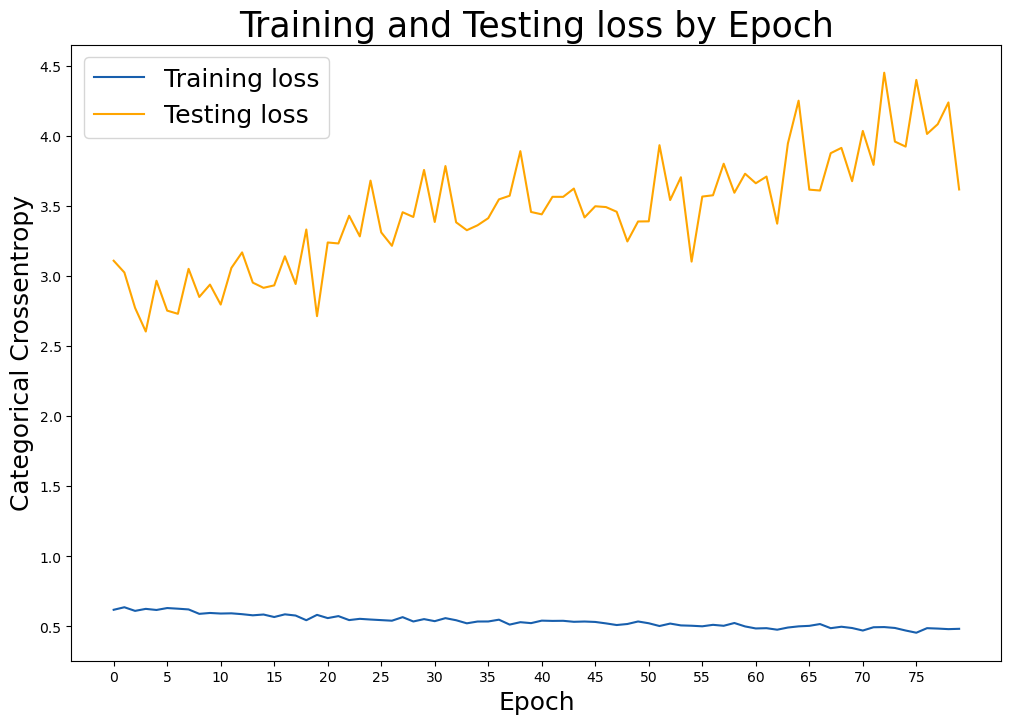

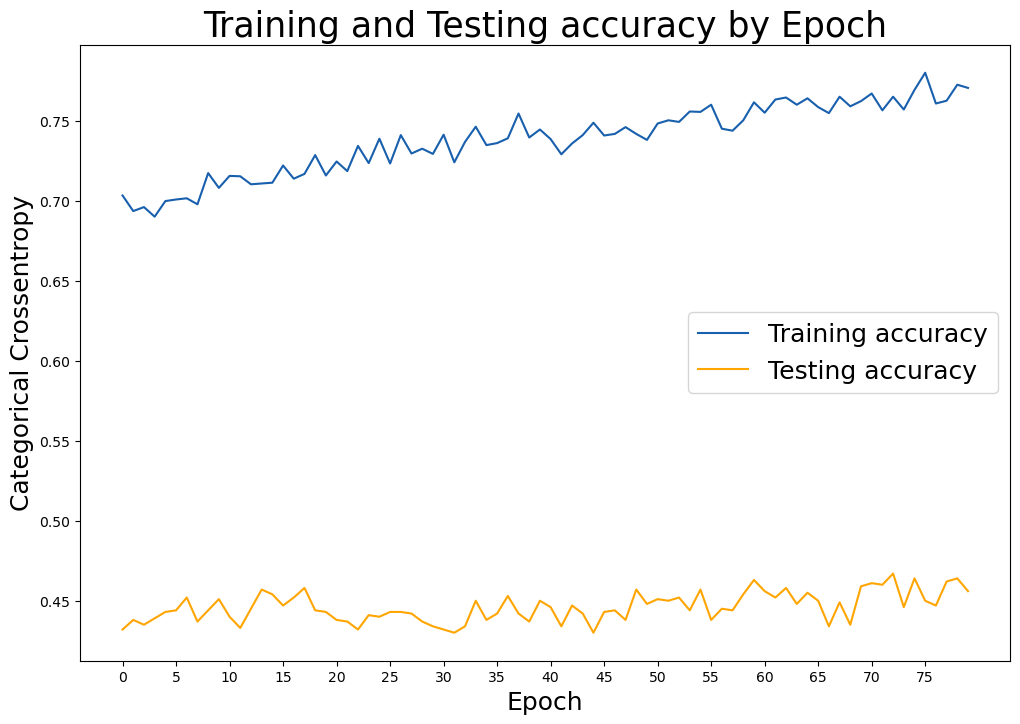

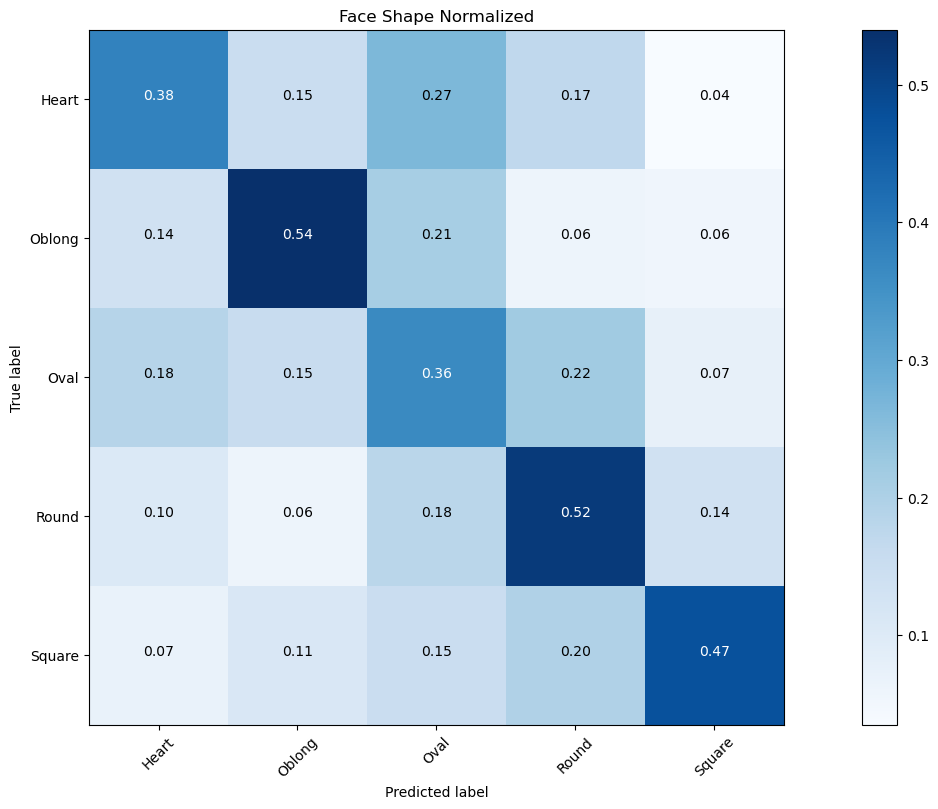

In [55]:
plot_summary_results(model_1, history_1, 80)

In [50]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'GRAYSCALE images - resize to 224x224.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_1, filepath=model_path, overwrite=True, include_optimizer=True
)


In [51]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))

In [52]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (3999, 224, 224, 1)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [53]:
# Model definition
model_2 = Sequential()

# Adding an explicit Input layer
model_2.add(Input(shape=X_train.shape[1:]))

# Adding convolutional and pooling layers
model_2.add(Conv2D(filters=8, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening and dense layers
model_2.add(Flatten())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, activation='softmax'))

# Compiling the model
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Model summary
model_2.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 222, 222, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,405 (2.57 MB)

 Trainable params: 674,405 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=80,
                        
                        validation_data=(X_test, y_test))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.2021 - loss: 1.6168 - val_accuracy: 0.2430 - val_loss: 1.6063
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.2217 - loss: 1.6038 - val_accuracy: 0.2790 - val_loss: 1.5821
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.2967 - loss: 1.5756 - val_accuracy: 0.3230 - val_loss: 1.5470
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.3282 - loss: 1.5343 - val_accuracy: 0.3500 - val_loss: 1.5294
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.3411 - loss: 1.5027 - val_accuracy: 0.3620 - val_loss: 1.5144
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.3531 - loss: 1.4729 - val_accuracy: 0.3630 - val_loss: 1.5039
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.3803 - loss: 1.4255 - val_accuracy: 0.3990 - val_loss: 1.4533
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.4295 - loss: 1

In [56]:
# max validation score @ Epoch 38/150
max(history_2.history['val_accuracy'])

0.4650000035762787

In [57]:
model_2.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4487 - loss: 4.1072


[3.963270425796509, 0.4519999921321869]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
Normalized confusion matrix
[[0.485 0.11  0.175 0.15  0.08 ]
 [0.2   0.405 0.205 0.1   0.09 ]
 [0.205 0.125 0.38  0.17  0.12 ]
 [0.065 0.1   0.185 0.505 0.145]
 [0.105 0.07  0.165 0.175 0.485]]


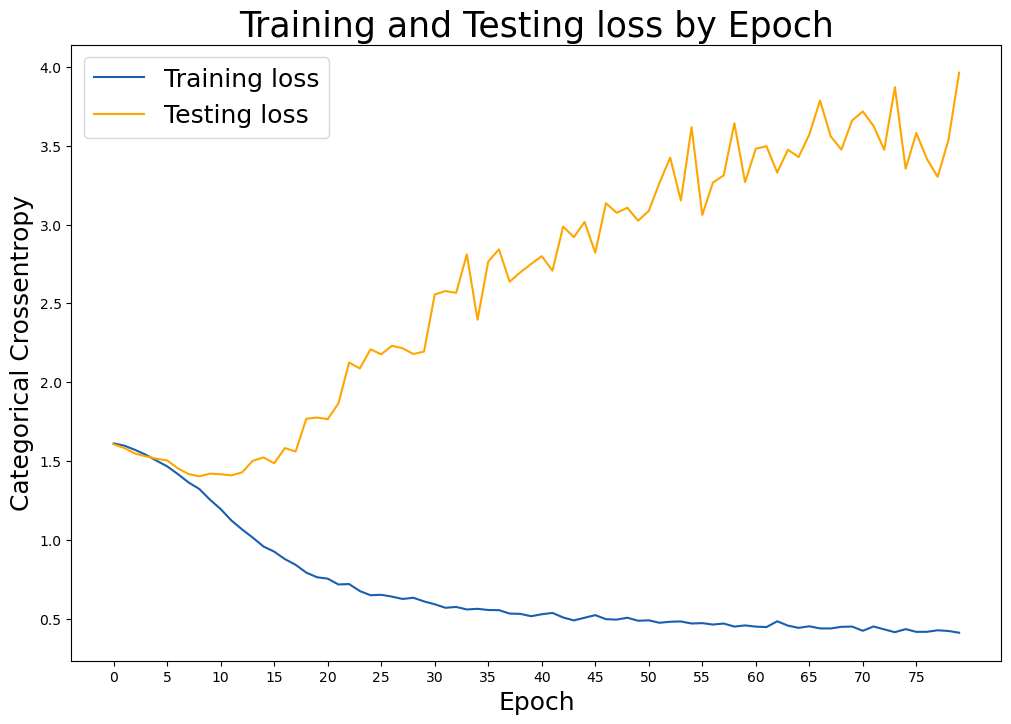

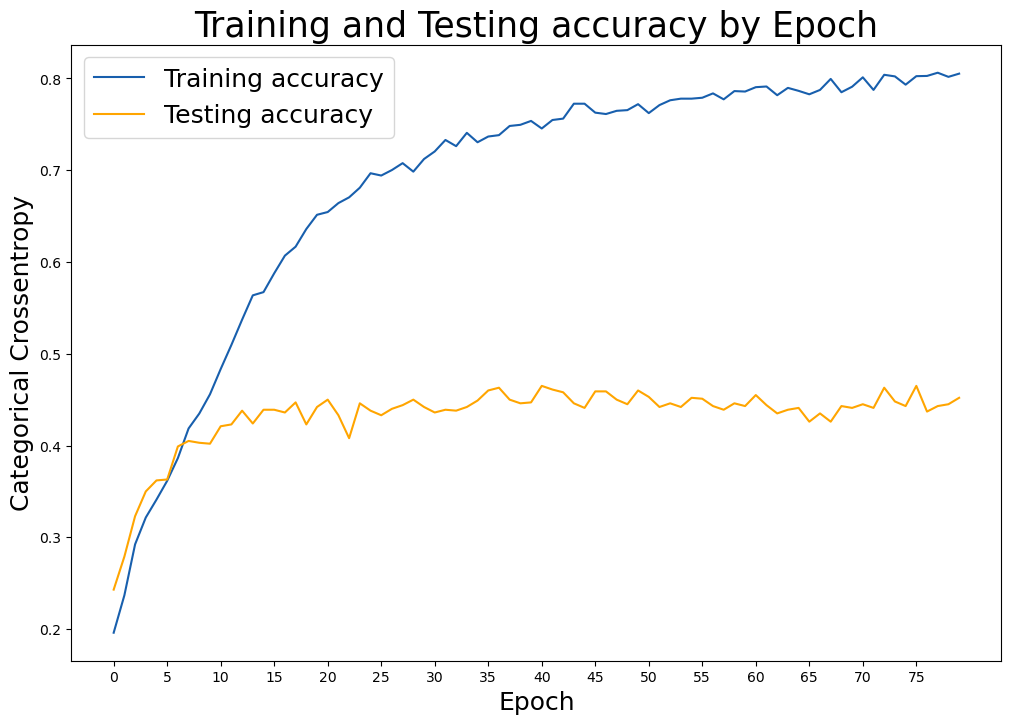

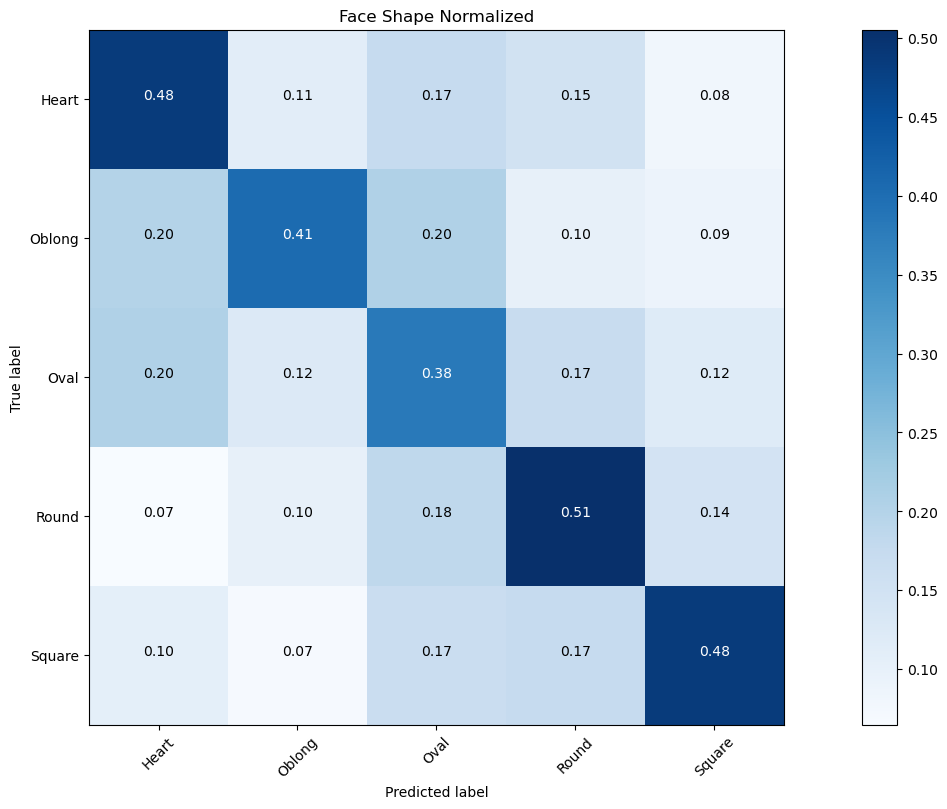

In [58]:
plot_summary_results(model_2, history_2, 80)

In [59]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'GRAYSCALE images - crop & resize keeping aspect ratio.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_2, filepath=model_path, overwrite=True, include_optimizer=True
)


In [60]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))

In [61]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (3999, 224, 224, 1)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
model_3 = Sequential()
model_3.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_3.add(Dropout(0.5))  ##added
model_3.add(Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 222, 222, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,405 (2.57 MB)

 Trainable params: 674,405 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0,  
                           patience=5, mode='auto')

In [65]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=80,
                        validation_data=(X_test, y_test))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.2126 - loss: 1.6147 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.2054 - loss: 1.6092 - val_accuracy: 0.3100 - val_loss: 1.5864
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.2623 - loss: 1.5918 - val_accuracy: 0.3460 - val_loss: 1.5496
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.3129 - loss: 1.5471 - val_accuracy: 0.3610 - val_loss: 1.5278
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.3156 - loss: 1.5269 - val_accuracy: 0.3530 - val_loss: 1.5074
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3349 - loss: 1.4958 - val_accuracy: 0.3590 - val_loss: 1.4968
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.3490 - loss: 1.4696 - val_accuracy: 0.3550 - val_loss: 1.4815
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.3547 - loss: 1

In [66]:
# max validation score @ Epoch 38/150
max(history_3.history['val_accuracy'])

0.46799999475479126

In [67]:
model_3.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4484 - loss: 3.3536


[3.358262777328491, 0.4399999976158142]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Normalized confusion matrix
[[0.34  0.14  0.26  0.16  0.1  ]
 [0.15  0.435 0.21  0.085 0.12 ]
 [0.17  0.12  0.38  0.235 0.095]
 [0.045 0.065 0.155 0.525 0.21 ]
 [0.095 0.09  0.125 0.17  0.52 ]]


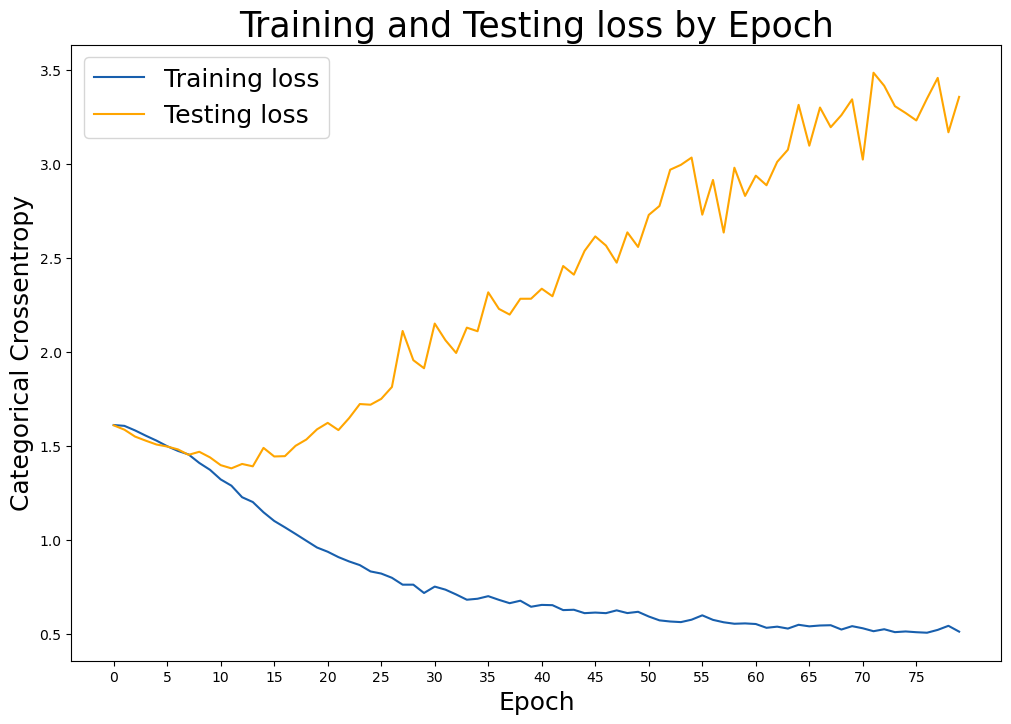

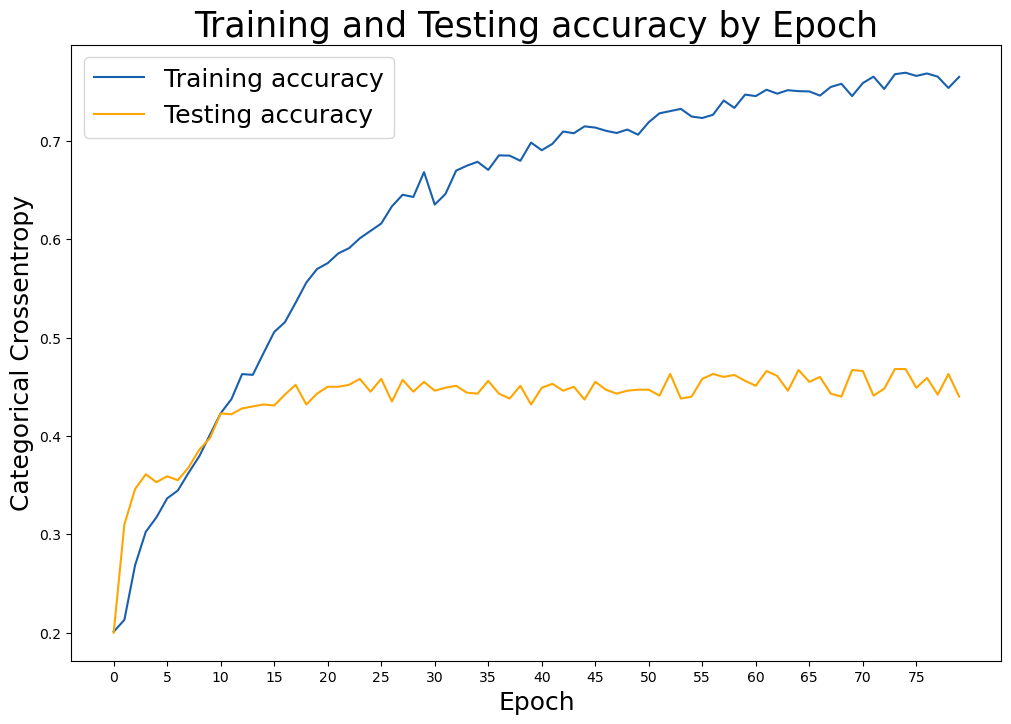

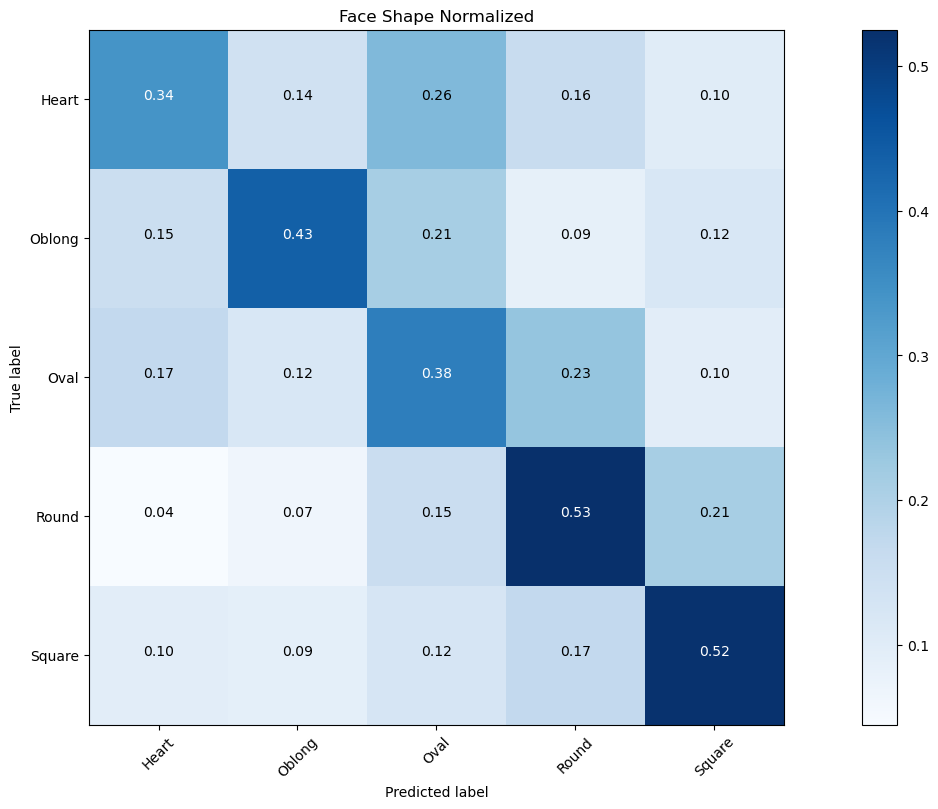

In [68]:
plot_summary_results(model_3, history_3, 80)

In [69]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'GRAYSCALE images - Detect Face with Bounding Box.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_3, filepath=model_path, overwrite=True, include_optimizer=True
)


In [6]:
path = "C:/Users/whisn/FaceShape Dataset/data/"

# Pastikan path dan nama file digabung dengan benar
X_train = np.asarray(pickle.load(open(path + "X_train_apr.pickle", "rb")))
y_train = np.asarray(pickle.load(open(path + "y_train_apr.pickle", "rb")))
X_test = np.asarray(pickle.load(open(path + "X_test_apr.pickle", "rb")))
y_test = np.asarray(pickle.load(open(path + "y_test_apr.pickle", "rb")))

In [7]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")


Data Summary
--------------------
X_train shape (3999, 224, 224, 1)
y_train shape (3999, 5)
--------------------
X_test shape (1000, 224, 224, 1)
y_test shape (1000, 5)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
model_4 = Sequential()
model_4.add(Conv2D(filters = 8,              # add this layer
                   kernel_size=3,
                   activation='relu',
                   input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 16,              # from 64
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Conv2D(filters = 64,             # from 128
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(filters = 128,            # from 256
                   kernel_size=3,
                   activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(32, activation='relu'))    # reduce from 128 to 64 to 32
model_4.add(Dropout(0.5))  ##added
model_4.add(Dense(5, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_4.summary()

C:\Users\whisn\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         589,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 674,405 (2.57 MB)

 Trainable params: 674,405 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_4 = model_4.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=200,
                        validation_data=(X_test, y_test)) #,
                        #callbacks=[early_stop])

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.1764 - loss: 1.6159 - val_accuracy: 0.2000 - val_loss: 1.6102
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.1923 - loss: 1.6098 - val_accuracy: 0.2240 - val_loss: 1.6045
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.2241 - loss: 1.6028 - val_accuracy: 0.2820 - val_loss: 1.5718
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.2618 - loss: 1.5816 - val_accuracy: 0.3290 - val_loss: 1.5585
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.2866 - loss: 1.5568 - val_accuracy: 0.3050 - val_loss: 1.5546
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.2799 - loss: 1.5514 - val_accuracy: 0.3330 - val_loss: 1.5295
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.3061 - loss: 1.5326 - val_accuracy: 0.3480 - val_loss: 1.5036
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.3331 -

In [10]:
# max validation score @ Epoch 238/250
max(history_4.history['val_accuracy'])

0.42500001192092896

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
Normalized confusion matrix
[[0.365 0.11  0.235 0.185 0.105]
 [0.17  0.42  0.24  0.09  0.08 ]
 [0.195 0.16  0.285 0.23  0.13 ]
 [0.125 0.095 0.195 0.47  0.115]
 [0.155 0.05  0.17  0.22  0.405]]


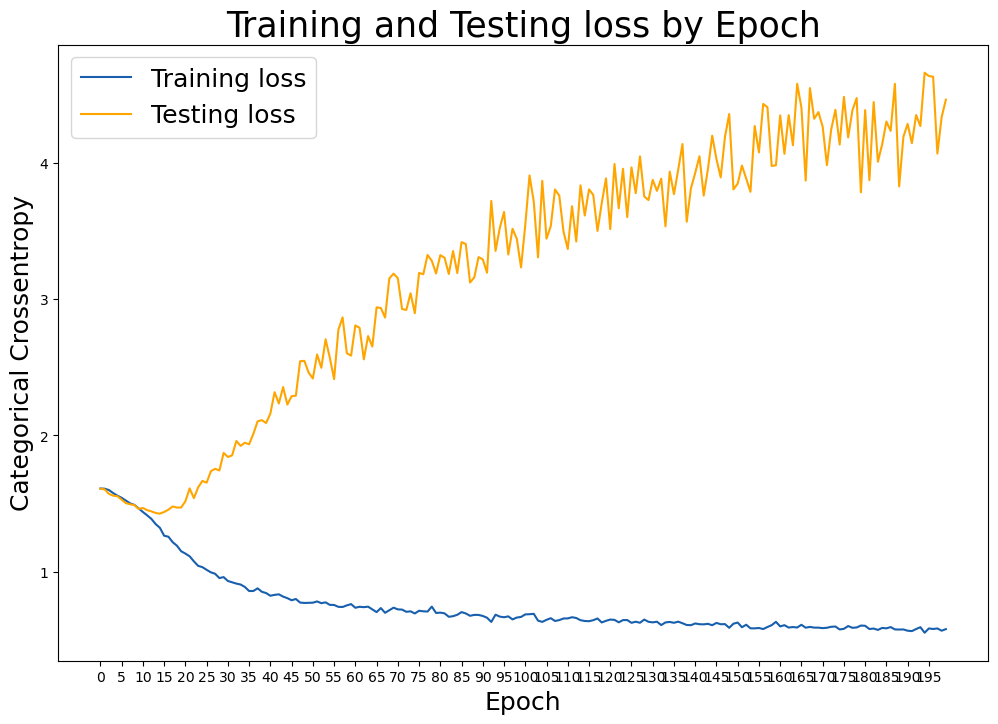

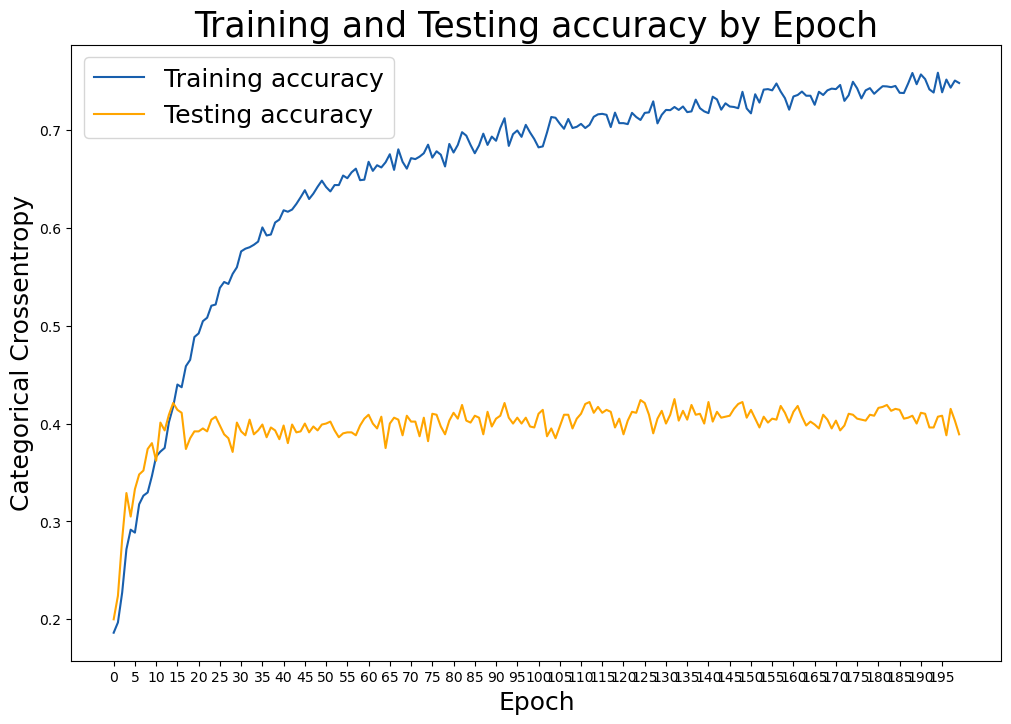

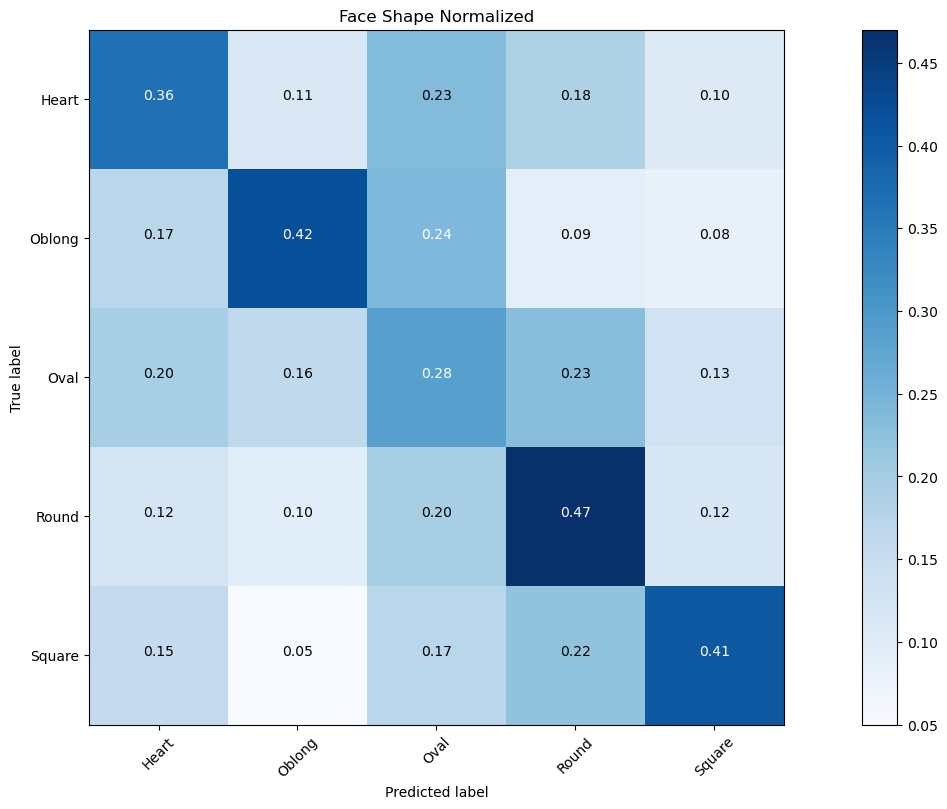

In [11]:
plot_summary_results(model_4, history_4, 200)

In [13]:
folder_path = 'C:/Users/whisn/FaceShape Dataset/saved_models/extra/'
filename = 'RGB COLOR images - Detect Face with Bounding Box.keras'

# Gabungkan folder dan nama file
model_path = folder_path + filename

# Simpan model
tf.keras.models.save_model(
    model_4, filepath=model_path, overwrite=True, include_optimizer=True
)


In [14]:
# Check if the file exists
if os.path.exists(model_path):
    print(f"File found: {model_path}")
    # Load the saved model
    loaded_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully!")
else:
    print(f"File not found: {model_path}")
    raise FileNotFoundError(f"The model file was not found at: {model_path}")

# Replace predict_classes with equivalent logic
def predict_classes(model, data):
    return np.argmax(model.predict(data), axis=-1)

# Get predictions for both models
# Ensure model_4 and X_test are defined beforehand
mod4_predict = predict_classes(model_4, X_test)
loaded4_predict = predict_classes(loaded_model, X_test)

# Check the difference
difference = np.sum(loaded4_predict - mod4_predict)
print(f'Difference in predictions: Saved model vs. original model is {difference}')

File found: C:/Users/whisn/FaceShape Dataset/saved_models/extra/RGB COLOR images - Detect Face with Bounding Box.keras
Model loaded successfully!
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Difference in predictions: Saved model vs. original model is 0
